# Decision Tree Classification

Decision trees are an intuitive and fundamental concept in machine learning, used for both classification and regression tasks.

### CART (Classification and Regression Trees)
- **Classification Trees**: These are used to classify data into distinct categories, such as "apple" vs. "orange" or "male" vs. "female." The output is a categorical variable.
- **Regression Trees**: These help predict continuous outcomes, like a person's salary or the temperature. The output is a real number. We saw this in the previous section (Part 2 Regression).

### Decision Tree Working Principle
A decision tree splits the dataset iteratively based on specific variables to create more homogeneous groups (or *leaves*). The process follows these steps:
1. **Splits**: The tree divides the data at certain points. For instance, in a 2D scatterplot, it might first split the data at `X2 = 60`, then at `X1 = 50`, and so on. The goal is to separate different categories of data (like red and green points).
  

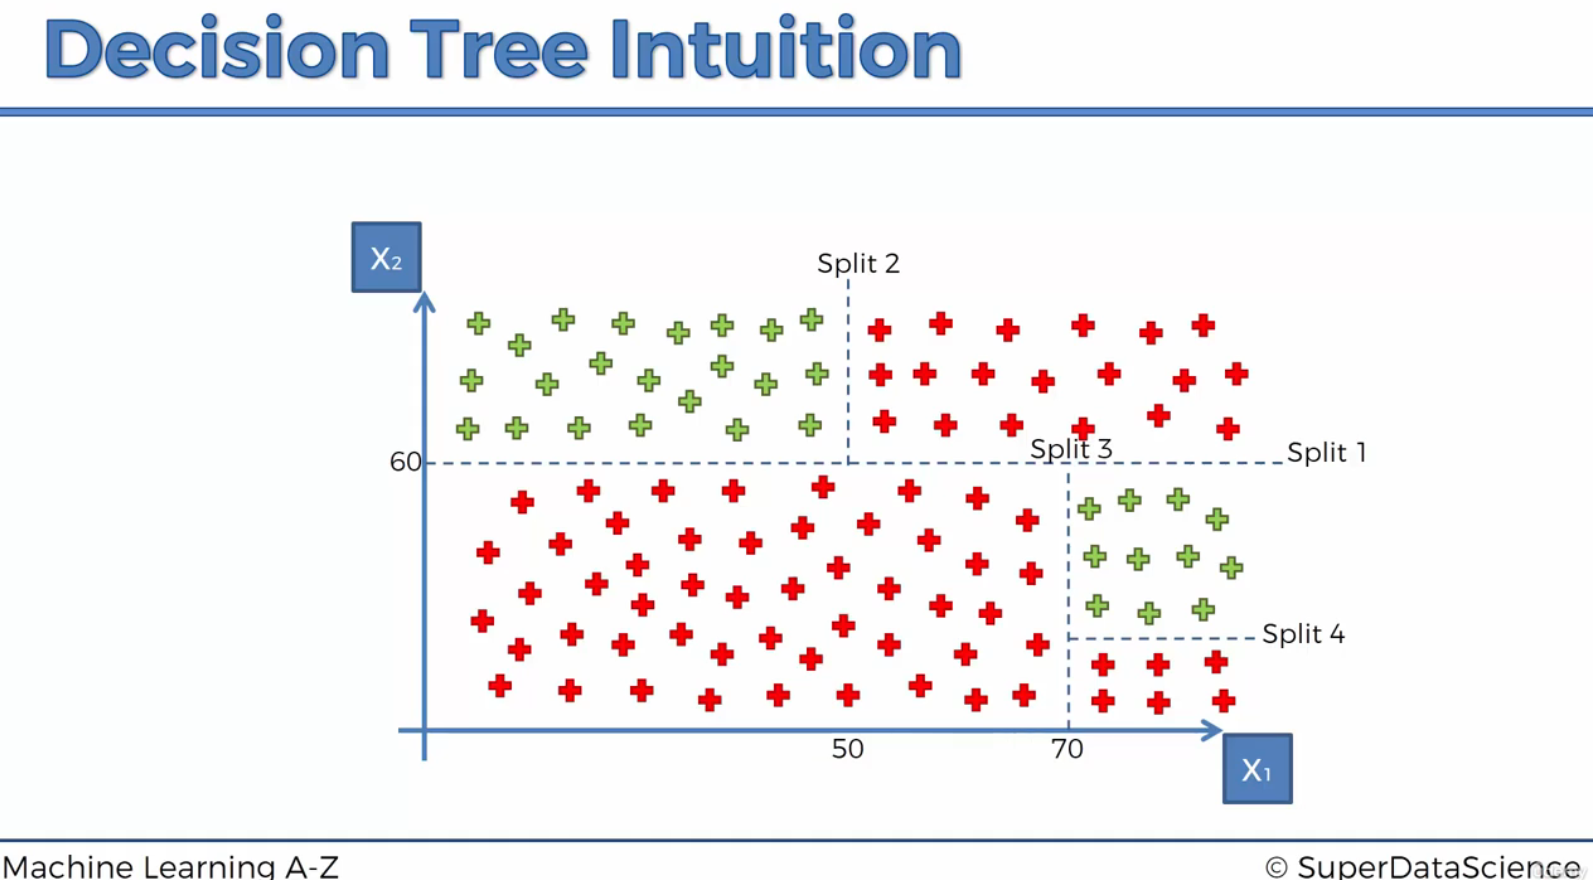


2. **Maximizing Homogeneity**: The algorithm tries to split the data such that each resulting "bucket" contains mostly one category of points. For example, after a split, one group might contain mostly red points and another green points. This reduces the "impurity" (measured by criteria like entropy or Gini index) and makes it easier to classify new data points.

3. **Information Entropy**: Decision trees aim to minimize entropy, which is a measure of disorder in the dataset. The splits are chosen to maximize the difference in information gain—i.e., how well the split distinguishes between categories.

4. **Tree Construction**: As splits are made, a tree structure is built. Each internal node asks a question (e.g., "Is X2 greater than 60?"). Depending on the answer (yes/no), the data moves down one branch of the tree. This process continues until the data is divided into terminal leaves.


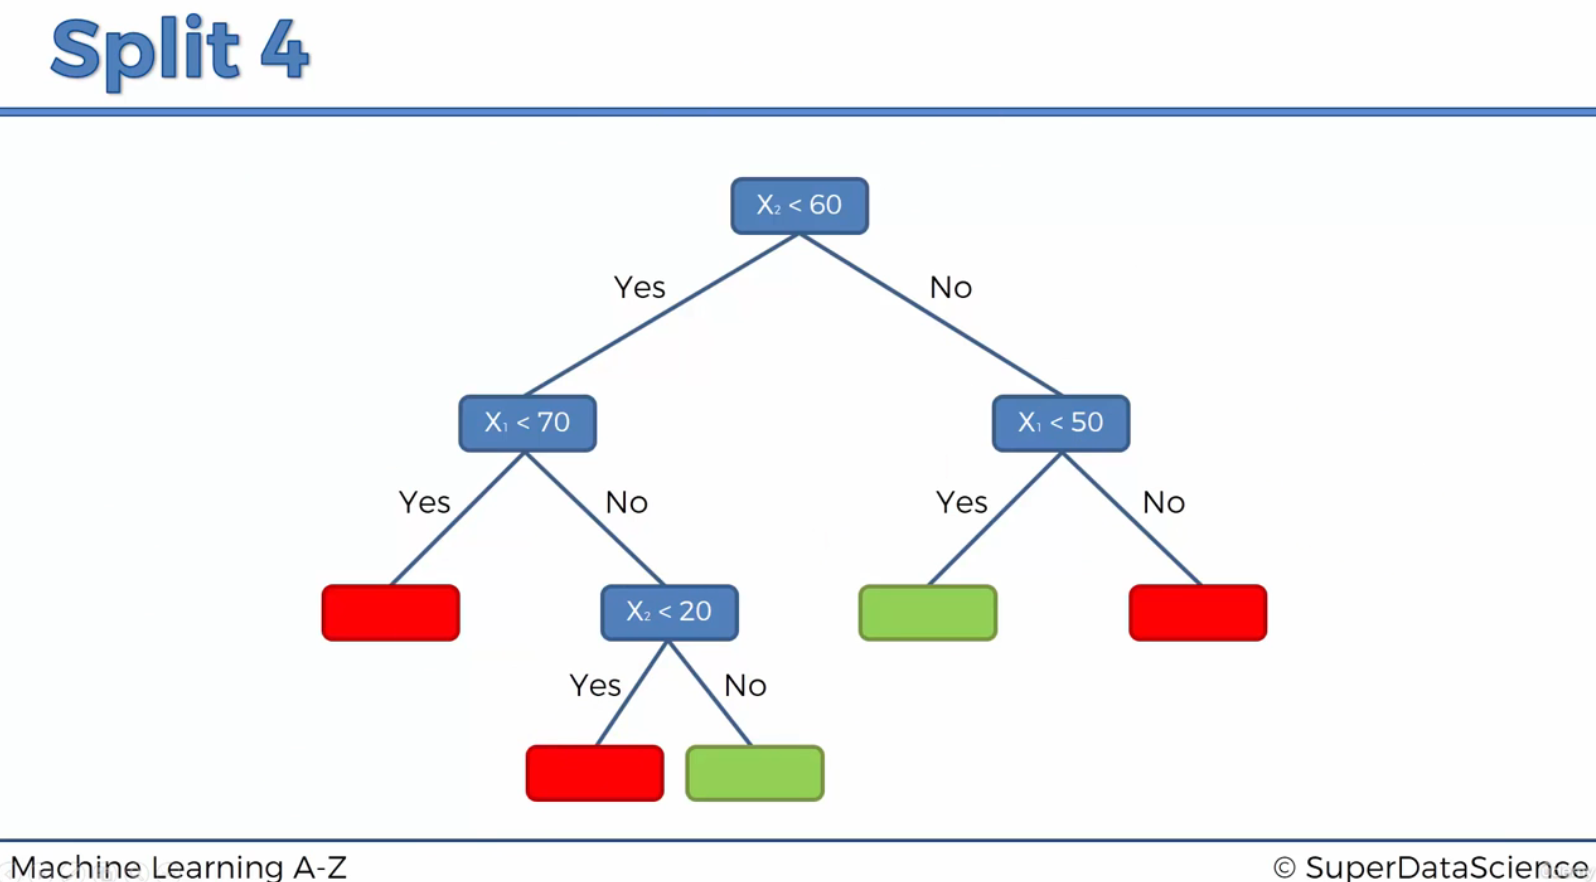


5. **Classifying New Data**: When new data is introduced, the tree directs the point through the splits based on its features. Even if a point doesn’t reach a terminal leaf, the algorithm can predict its classification based on the majority of the points in that part of the tree (probabilistic approach).

### Generalization to Higher Dimensions
- Decision trees can handle more than two features. They work on multidimensional datasets, where each split might involve a different feature. The algorithm selects the most relevant questions (splits) for creating homogeneous groups.

### Limitations and Modern Enhancements
- **Basic Trees**: Decision trees on their own can be simple and prone to overfitting (fitting too closely to training data, which hurts their performance on new data).
- **Ensemble Methods**: Modern techniques like Random Forests and Gradient Boosting build on decision trees. These methods combine multiple decision trees to form more powerful models. For example, Random Forests create an ensemble of trees to improve accuracy and generalization, while Gradient Boosting focuses on correcting mistakes made by previous trees.

**Conclusion**:
Despite their simplicity, decision trees form the foundation for more advanced machine learning models and are widely used in various applications like facial recognition and gesture tracking in gaming.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning A-Z/Part 3 - Classification/6 Decision Tree Classification/Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values # matrix of features
y = dataset.iloc[:, -1].values # dependent variable vector

## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split

# Split data into 75% training and 25% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
print(X_train)

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  72000]
 [    45  26000]
 [    33  69000]
 [    20  82000]
 [    31  74000]
 [    42  80000]
 [    35  72000]
 [    33 149000]
 [    40  71000]
 [    51 146000]
 [    46  79000]
 [    35  75000]
 [    38  51000]
 [    36  75000]
 [    37  78000]
 [    38  61000]
 [    60 108000]
 [    20  82000]
 [    57  74000]
 [    42  65000]
 [    26  8000

In [6]:
print(y_train)

[0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 0]


In [7]:
print(X_test)

[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]
 [    30  49000]
 [    28  55000]
 [    37  55000]
 [    39  77000]
 [    20  86000]
 [    32 117000]
 [    37  77000]
 [    19  85000]
 [    55 130000]
 [    35  22000]
 [    35  47000]
 [    47 144000]
 [    41  51000]
 [    47 105000]
 [    23  28000]
 [    49 141000]
 [    28  87000]
 [    29  80000]
 [    37  62000]
 [    32  86000]
 [    21  88000]
 [    37  79000]
 [    57  60000]
 [    37  53000]
 [    24  58000]
 [    18  52000]
 [    22  81000]
 [    34  43000]
 [    31  34000]
 [    49  36000]
 [    27  88000]
 [    41  52000]
 [    27  84000]
 [    35  20000]
 [    43 112000]
 [    27  58000]
 [    37  80000]
 [    52  90000]
 [    26  30000]
 [    49  86000]
 [    57 122000]
 [    34  25000]
 [    35  57000]
 [    34 115000]
 [    59  88000]
 [    45  32000]
 [    29  83000]
 [    26  80000]
 [    49  2800

In [8]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


## Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Fit the scaler to X_train and transform X_train to standardize it (mean=0, std=1)
X_train = sc.fit_transform(X_train)

# Transform X_test using the same scaler (fitted on X_train) to ensure consistent scaling
X_test = sc.transform(X_test)

In [10]:
print(X_train)

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]
 [-1.20093113 -1.58254245]
 [ 2.1661655   0.93986109]
 [-0.01254409  1.22979253]
 [ 0.18552042  1.08482681]
 [ 0.38358493 -0.48080297]
 [-0.30964085 -0.30684411]
 [ 0.97777845 -0.8287207 ]
 [ 0.97777845  1.8676417 ]
 [-0.01254409  1.25878567]
 [-0.90383437  2.27354572]
 [-1.20093113 -1.58254245]
 [ 2.1661655  -0.79972756]
 [-1.39899564 -1.46656987]
 [ 0.38358493  2.30253886]
 [ 0.77971394  0.76590222]
 [-1.00286662 -0.30684411]
 [ 0.08648817  0.76590222]
 

In [11]:
print(X_test)

[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]
 [-1.10189888 -1.43757673]
 [-0.70576986 -1.58254245]
 [-0.21060859  2.15757314]
 [-1.99318916 -0.04590581]
 [ 0.8787462  -0.77073441]
 [-0.80480212 -0.59677555]
 [-1.00286662 -0.42281668]
 [-0.11157634 -0.42281668]
 [ 0.08648817  0.21503249]
 [-1.79512465  0.47597078]
 [-0.60673761  1.37475825]
 [-0.11157634  0.21503249]
 [-1.89415691  0.44697764]
 [ 1.67100423  1.75166912]
 [-0.30964085 -1.37959044]
 [-0.30964085 -0.65476184]
 [ 0.8787462   2.15757314]
 [ 0.28455268 -0.53878926]
 [ 0.8787462   1.02684052]
 [-1.49802789 -1.20563157]
 [ 1.07681071  2.07059371]
 [-1.00286662  0.50496393]
 [-0.90383437  0.30201192]
 [-0.11157634 -0.21986468]
 [-0.60673761  0.47597078]
 [-1.6960924   0.53395707]
 [-0.11157634  0.27301877]
 [ 1.86906873 -0.27785096]
 [-0.11157634 -0.48080297]
 [-1.39899564 -0.33583725]
 [-1.99318916 -0.50979612]
 [-1.59706014  0.33100506]
 

## Training the Decision Tree Classification model on the Training set

In [12]:
# Import the DecisionTreeClassifier class from sklearn
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier object with 'entropy' as the criterion for splitting
# 'random_state' ensures that the results are reproducible
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

# Fit the classifier to the training data (X_train, y_train)
# This step trains the decision tree model on the provided training dataset
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Predicting a new result

In [13]:
# Predict the class (0 or 1) for a new data point with Age=30 and EstimatedSalary=87000, after scaling it
print(classifier.predict(sc.transform([[30,87000]])))

[0]


## Predicting the Test set results

In [14]:
# Predict the target labels for the test set using the trained classifier
y_pred = classifier.predict(X_test)

# Concatenate the predicted labels (y_pred) and the actual test labels (y_test) into a single array for comparison
# Reshape both y_pred and y_test into column vectors and concatenate them horizontally (axis=1)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


## Making the Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Compute the confusion matrix to compare predicted and actual labels in the test set
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix, which shows true positives, true negatives, false positives, and false negatives
print(cm)

# Calculate and return the accuracy score, which is the proportion of correctly predicted labels
accuracy_score(y_test, y_pred)

[[62  6]
 [ 3 29]]


0.91

The confusion matrix:

- **62**: True negatives (correctly predicted class 0)
- **29**: True positives (correctly predicted class 1)
- **6**: False positives (incorrectly predicted as class 1, but actually class 0)
- **3**: False negatives (incorrectly predicted as class 0, but actually class 1)

The **accuracy score** of **0.91** means that the model correctly predicted 91% of the test set, reflecting a high level of accuracy in this classification task.

91% its actually in the podium, right after K-NN and Kernel SVM.

## Visualising the Training set results

<ipython-input-16-5bbb9c996a1f>:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


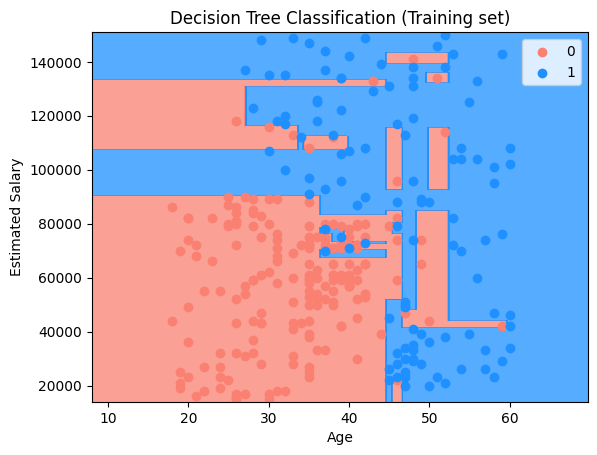

In [16]:
from matplotlib.colors import ListedColormap

# Reverse the scaling on the training data to get the original feature values (Age, Estimated Salary)
X_set, y_set = sc.inverse_transform(X_train), y_train

# Create a mesh grid for plotting the decision boundary, defining the range for Age and Estimated Salary
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

# Plot the decision boundary by classifying each point on the grid using the trained classifier
# Use `contourf` to fill the background regions with colors corresponding to each class (0 or 1)
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))

# Set the x and y axis limits to the min and max values of the mesh grid
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot the training data points with different colors for each class
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)

plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Unlike linear classifiers (like SVM or Naive Bayes), which struggle with complex data points, decision trees divide the grid into smaller sub-grids using multiple splits. This allows the model to create distinct prediction regions, effectively capturing hard-to-classify points.

The model accurately identifies customers who didn't buy the SUV (red) and those who did (blue), even managing to classify outliers, such as green points surrounded by red. However, the we have to be careful: this success was on the training set, we need to careful evaluate on unseen data.

## Visualising the Test set results

<ipython-input-17-ea2f3d206552>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


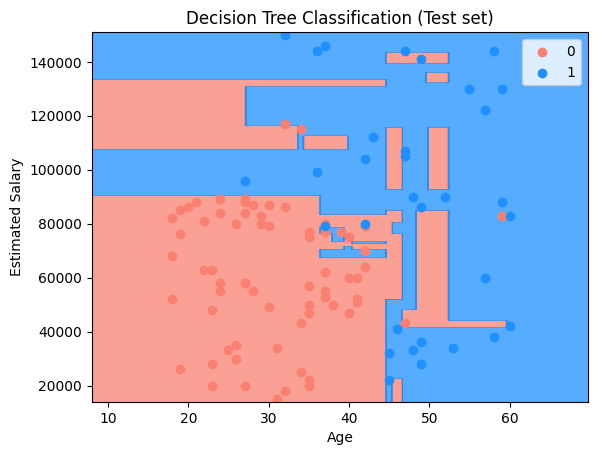

In [17]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_test), y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)

plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

While most predictions are correct, there are a few errors. In one region, the model doesn't capture either red or blue customers correctly, leading to two incorrect predictions.

Most small age and low salary customers are accurately predicted as not buying the SUV, but a few errors persist. Despite 10 incorrect predictions overall, the model isn't overfitting, as it performs well even on new test data.